<p style="font-family: 'Courier New', Courier, monospace; font-size: 50px; font-weight: bold; color: blue;  text-align: center;">
  LoRaWAN Path Loss Measurements in an Indoor Setting: DATA SORTING
</p>

In [2]:
# Libraries/Packages Used:

import pandas as pd                        # For data manipulation and analysis.
import matplotlib.pyplot as plt            # For creating static visualizations.

In [3]:
# Read data from a local CSV file
new_df = pd.read_csv('../all_data_files/unsorted_combined_measurements_data.csv', low_memory=False)

# Print the info about the combined DataFrame
print("\nInfo of Combined DataFrame:\n")
new_df


Info of Combined DataFrame:



,correlation_ids_0,device_id,end_device_ids_application_ids_application_id,end_device_ids_dev_addr,end_device_ids_dev_eui,end_device_ids_device_id,end_device_ids_join_eui,received_at,time,uplink_message_confirmed,...,uplink_message_settings_data_rate_lora_coding_rate,uplink_message_settings_data_rate_lora_spreading_factor,uplink_message_settings_frequency,uplink_message_settings_time,uplink_message_settings_timestamp,uplink_message_version_ids_band_id,uplink_message_version_ids_brand_id,uplink_message_version_ids_firmware_version,uplink_message_version_ids_hardware_version,uplink_message_version_ids_model_id
0,gs:uplink:01J8PZVAYFB1Y3CDR10MCHH43E,up,pilot-test,260B46AE,A8610A3230257716,pilotdevice03,0,2024-09-26T11:00:52.510624152Z,2024-09-26 13:00:52.541686+02:00,True,...,4/5,10.0,867900000,2024-09-26T11:00:52.268982Z,2.627461e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310
1,gs:uplink:01J8PZVAYFB1Y3CDR10MCHH43E,up,pilot-test,260B46AE,A8610A3230257716,pilotdevice03,0,2024-09-26T11:00:52.510624152Z,2024-09-26 13:00:52.542462+02:00,True,...,4/5,10.0,867900000,2024-09-26T11:00:52.268982Z,2.627461e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310
2,gs:uplink:01J8PZVTC2YGT0JW8R7XYW7J9D,up,pilot-test,260B41EC,A8610A34362A8316,pilotdevice,0,2024-09-26T11:01:08.305577574Z,2024-09-26 13:01:08.336258+02:00,True,...,4/5,9.0,868100000,2024-09-26T11:01:08.065003Z,2.643257e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310
3,gs:uplink:01J8PZVTC2YGT0JW8R7XYW7J9D,up,pilot-test,260B41EC,A8610A34362A8316,pilotdevice,0,2024-09-26T11:01:08.305577574Z,2024-09-26 13:01:08.338296+02:00,True,...,4/5,9.0,868100000,2024-09-26T11:01:08.065003Z,2.643257e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310
4,gs:uplink:01J8PZW0BX58S4QHK38X4A9KHJ,up,pilot-test,260B92C1,A8610A3436385E17,pilotdevice01,0,2024-09-26T11:01:14.446529545Z,2024-09-26 13:01:14.477162+02:00,True,...,4/5,9.0,867500000,2024-09-26T11:01:14.203163Z,2.649395e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825307,gs:uplink:01JPPZFMX8P7VVYPE4YK23SYPR,up,pilot-test,260BED96,A8610A3230378316,pilotdevice02,0,2025-03-19T10:34:15.032363578Z,2025-03-19 11:34:15.057865+01:00,True,...,4/5,8.0,867900000,2025-03-19T10:34:14.785868Z,4.243599e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310
1825308,gs:uplink:01JPPZG4J57NCM5EKFJDRZS90J,up,pilot-test,260BEB3D,A8610A34362A8316,pilotdevice,0,2025-03-19T10:34:31.057785892Z,2025-03-19 11:34:31.084236+01:00,True,...,4/5,8.0,867300000,2025-03-19T10:34:30.813817Z,4.259627e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310
1825309,gs:uplink:01JPPZGE0AYAR19JJSCRCBKBR8,up,pilot-test,260B5157,A8610A32301F8516,pilotdevice05,0,2025-03-19T10:34:40.728457948Z,2025-03-19 11:34:40.756671+01:00,True,...,4/5,12.0,868300000,2025-03-19T10:34:40.457649Z,4.269271e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310
1825310,gs:uplink:01JPPZGN3B8KTEQGM6F2NC78YM,up,pilot-test,260B9807,A8610A3436385E17,pilotdevice01,0,2025-03-19T10:34:47.992408529Z,2025-03-19 11:34:48.017767+01:00,True,...,4/5,12.0,868300000,NaN,3.200445e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310


In [4]:
#new_df['data'] = new_df['data'].apply(json.loads)
#expanded = pd.json_normalize(new_df['data'])
## If you need to combine with other columns, uncomment the next line:
## new_df = pd.concat([new_df[['id','ts','device_id']], expanded], axis=1)

#new_df = expanded.rename(columns={"received_at": "time"})
#print("\nInfo of Combined DataFrame:\n")
#new_df.info()

Found 2 rows with invalid datetime format:


C:\Users\nahsh\AppData\Local\Temp\ipykernel_20864\4086194706.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['time'].dt.date


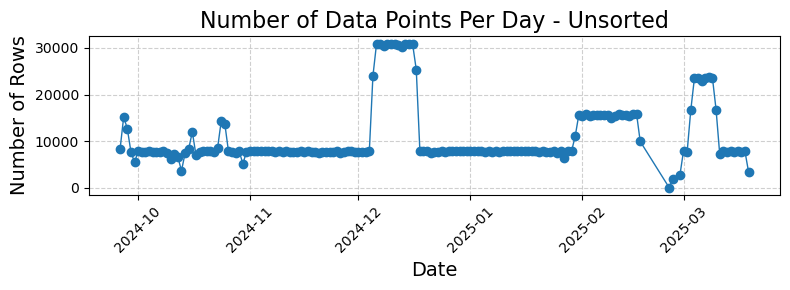

In [5]:
# Ensure 'time' column is in string format
new_df['time'] = new_df['time'].astype(str)

# Convert 'time' to datetime, handling time zones and errors
new_df['time'] = pd.to_datetime(new_df['time'], errors='coerce', utc=True)

# Check for rows where parsing failed
invalid_times = new_df[new_df['time'].isna()]
if not invalid_times.empty:
    print(f"Found {len(invalid_times)} rows with invalid datetime format:")

# Drop rows with invalid 'time' values
new_df = new_df.dropna(subset=['time'])

# Extract the date part from the 'time' column
new_df['date'] = new_df['time'].dt.date

# Count the number of rows per day
rows_per_day = new_df.groupby('date').size()

# Plot the number of rows per day as a line plot
plt.figure(figsize=(8, 3))
rows_per_day.plot(kind='line', marker='o', linestyle='-', linewidth=1)
plt.title('Number of Data Points Per Day - Unsorted', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Initialize an empty set to collect unique gateway IDs
unique_gateways = set()

# Loop over the metadata indices (adjust the range if you have more metadata columns)
for i in range(3):  # this covers metadata_0, metadata_1, metadata_2
    col_name = f'uplink_message_rx_metadata_{i}_gateway_ids_gateway_id'
    if col_name in new_df.columns:
        # Add unique values from the column to the set, excluding NaN
        unique_gateways.update(new_df[col_name].dropna().unique())

# Number of unique gateways
num_unique_gateways = len(unique_gateways)
print("Number of unique gateways:", num_unique_gateways)

# Optionally, list them
print("Unique gateway IDs:", unique_gateways)

Number of unique gateways: 4
Unique gateway IDs: {'eui-a84041ffff22def8', 'eui-a84041ffff22dea4', 'kerlink001', 'kerlink-istation'}


In [7]:
# Initialize an empty set to collect unique gateway IDs
unique_gateways = set()

# Loop over the metadata indices to find all unique gateway IDs
for i in range(3):  # This covers metadata_0, metadata_1, metadata_2
    col_name = f'uplink_message_rx_metadata_{i}_gateway_ids_gateway_id'
    if col_name in new_df.columns:
        # Add unique values from the column to the set, excluding NaN
        unique_gateways.update(new_df[col_name].dropna().unique())

# Dictionary to store the sum of rows for each gateway
gateway_row_counts = {}

# Count rows for each gateway across all metadata columns
for gw in unique_gateways:
    # Create a boolean mask for the gateway in any metadata column
    mask = (
        (new_df['uplink_message_rx_metadata_0_gateway_ids_gateway_id'] == gw) |
        (new_df['uplink_message_rx_metadata_1_gateway_ids_gateway_id'] == gw) |
        (new_df['uplink_message_rx_metadata_2_gateway_ids_gateway_id'] == gw)
    )
    # Count rows where the mask is True
    gateway_row_counts[gw] = mask.sum()

# Print the results
print("Rows per gateway:")
for gw, count in gateway_row_counts.items():
    print(f"{gw}: {count}")

Rows per gateway:
eui-a84041ffff22def8: 1282410
eui-a84041ffff22dea4: 249802
kerlink001: 1802287
kerlink-istation: 15


In [8]:
# Define the target gateway ID
target_gateway = "kerlink001"

# Create a boolean mask for rows where the gateway ID matches in any metadata column
mask = (
    (new_df['uplink_message_rx_metadata_0_gateway_ids_gateway_id'] == target_gateway) |
    (new_df['uplink_message_rx_metadata_1_gateway_ids_gateway_id'] == target_gateway) |
    (new_df['uplink_message_rx_metadata_2_gateway_ids_gateway_id'] == target_gateway)
)

# Filter the DataFrame to retain only rows with the target gateway
new_df = new_df[mask]

# Reset the index if desired (optional)
new_df.reset_index(drop=True, inplace=True)

# Display the result
new_df.shape

(1802287, 82)

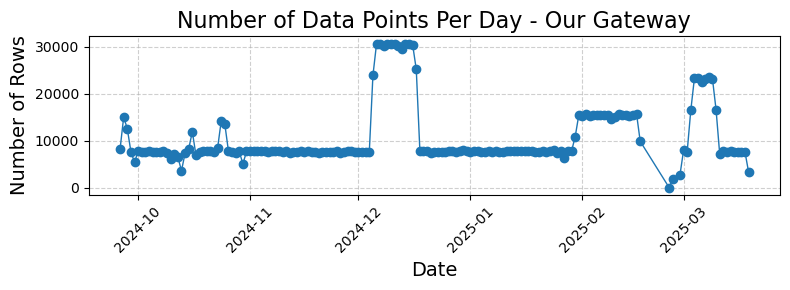

In [9]:
# Ensure 'time' column is in string format
new_df['time'] = new_df['time'].astype(str)

# Convert 'time' to datetime, handling time zones and errors
new_df['time'] = pd.to_datetime(new_df['time'], errors='coerce', utc=True)

# Check for rows where parsing failed
invalid_times = new_df[new_df['time'].isna()]
if not invalid_times.empty:
    print(f"Found {len(invalid_times)} rows with invalid datetime format:")

# Drop rows with invalid 'time' values
new_df = new_df.dropna(subset=['time'])

# Extract the date part from the 'time' column
new_df['date'] = new_df['time'].dt.date

# Count the number of rows per day
rows_per_day = new_df.groupby('date').size()

# Plot the number of rows per day as a line plot
plt.figure(figsize=(8, 3))
rows_per_day.plot(kind='line', marker='o', linestyle='-', linewidth=1)
plt.title('Number of Data Points Per Day - Our Gateway', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Original shape: (1802287, 84)
Deduplicated shape: (1232406, 82)


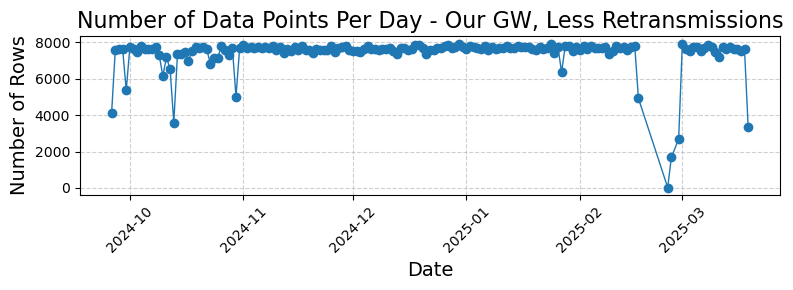

In [10]:
# Ensure 'time' is datetime and sort the DataFrame
new_df["time"] = pd.to_datetime(new_df["time"], utc=True, errors="coerce")
new_df = new_df.sort_values(["end_device_ids_device_id", "time"]).copy()

# Compute group-wise differences in a vectorized way
# Calculate time difference and frame counter difference within each device group
new_df["dt"] = new_df.groupby("end_device_ids_device_id")["time"].diff().dt.total_seconds()
new_df["df_cnt"] = new_df.groupby("end_device_ids_device_id")["uplink_message_f_cnt"].diff()

# Create a boolean mask for non-duplicate rows
# A row is considered a duplicate if:
#    - The difference in frame count (df_cnt) is 0
#    - The time difference (dt) is less than the threshold (2.0 seconds)
non_duplicate_mask = ~((new_df["df_cnt"] == 0) & (new_df["dt"] < 2.0))

# Apply the mask to filter the DataFrame
df_dedup = new_df[non_duplicate_mask].copy()

# Clean up intermediate columns if not needed
df_dedup.drop(columns=["dt", "df_cnt"], inplace=True, errors="ignore")
df_dedup.reset_index(drop=True, inplace=True)

print("Original shape:", new_df.shape)
print("Deduplicated shape:", df_dedup.shape)

# Plot daily counts
df_dedup["date"] = df_dedup["time"].dt.date
daily_counts = df_dedup.groupby("date").size()

plt.figure(figsize=(8, 3))
daily_counts.plot(
    kind='line',
    marker='o',
    linestyle='-',
    linewidth=1
)
plt.title('Number of Data Points Per Day - Our GW, Less Retransmissions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Save the cleaned and aggregated and SORTED data to a CSV file 
df_dedup.to_csv('../all_data_files/combined_measurements_data.csv', index=False)

print("Data sorting and removal of duplicates completed. A CSV file has been saved!")

print("\n DATA INFORMATION. \n")
df_dedup.info()

Data sorting and removal of duplicates completed. A CSV file has been saved!

 DATA INFORMATION. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232406 entries, 0 to 1232405
Data columns (total 82 columns):
 #   Column                                                   Non-Null Count    Dtype              
---  ------                                                   --------------    -----              
 0   correlation_ids_0                                        1232406 non-null  object             
 1   device_id                                                1232406 non-null  object             
 2   end_device_ids_application_ids_application_id            1232406 non-null  object             
 3   end_device_ids_dev_addr                                  1232406 non-null  object             
 4   end_device_ids_dev_eui                                   1232406 non-null  object             
 5   end_device_ids_device_id                                 1232406 non-null  object  

In [12]:
df_dedup.tail(10)

,correlation_ids_0,device_id,end_device_ids_application_ids_application_id,end_device_ids_dev_addr,end_device_ids_dev_eui,end_device_ids_device_id,end_device_ids_join_eui,received_at,time,uplink_message_confirmed,...,uplink_message_settings_data_rate_lora_spreading_factor,uplink_message_settings_frequency,uplink_message_settings_time,uplink_message_settings_timestamp,uplink_message_version_ids_band_id,uplink_message_version_ids_brand_id,uplink_message_version_ids_firmware_version,uplink_message_version_ids_hardware_version,uplink_message_version_ids_model_id,date
1232396,gs:uplink:01JJRVY5D7HRC56E69HJNR1BAJ,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:07:57.944410062Z,2025-01-29 11:07:57.971066+00:00,True,...,12.0,868500000,2025-01-29T11:07:57.675045Z,3.211643e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232397,gs:uplink:01JJRW0G2RXG9M7MTBY4TNVRZ5,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:09:14.405190448Z,2025-01-29 11:09:14.433548+00:00,True,...,12.0,867900000,2025-01-29T11:09:14.142329Z,3.288110e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232398,gs:uplink:01JJRW3NEC152Y4RH68WMK5JQN,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:10:58.203436452Z,2025-01-29 11:10:58.231703+00:00,True,...,11.0,868100000,2025-01-29T11:10:57.957262Z,3.391925e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232399,gs:uplink:01JJRW6042AY1EC1JCAPWG36KY,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:12:14.686310289Z,2025-01-29 11:12:14.714619+00:00,True,...,11.0,867500000,2025-01-29T11:12:14.423554Z,3.468392e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232400,gs:uplink:01JJRW78WMJDKKJ3ARVFR473R9,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:12:56.423484950Z,2025-01-29 11:12:56.450676+00:00,True,...,11.0,868500000,2025-01-29T11:12:56.173194Z,3.510141e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232401,gs:uplink:01JJRW93HHYTCP1G6DEB524JPX,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:13:56.483298039Z,2025-01-29 11:13:56.511742+00:00,True,...,11.0,867900000,2025-01-29T11:13:56.225962Z,3.570194e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232402,gs:uplink:01JJRWAXN566DRPYZ0EVXK1944,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:14:55.986247587Z,2025-01-29 11:14:56.014379+00:00,True,...,10.0,868300000,2025-01-29T11:14:55.747108Z,3.629715e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232403,gs:uplink:01JJRWCRA1CNF45JY7F8RQSGWK,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:15:56.045457219Z,2025-01-29 11:15:56.074514+00:00,True,...,10.0,867900000,2025-01-29T11:15:55.802812Z,3.689771e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232404,gs:uplink:01JJRWEJYSJVH43SGSPYDY3K60,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:16:56.105283552Z,2025-01-29 11:16:56.132382+00:00,True,...,10.0,867500000,2025-01-29T11:16:55.859469Z,3.749827e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
1232405,gs:uplink:01JJRWGDKHQN7BP9CMK1FSKVE2,up,pilot-test,260BBBD6,A8610A32303B7219,pilotdevice06,0,2025-01-29T11:17:56.162296967Z,2025-01-29 11:17:56.189602+00:00,True,...,10.0,867100000,2025-01-29T11:17:55.916136Z,3.809884e+09,EU_863_870,arduino,1.2.3,1.0,mkr-wan-1310,2025-01-29
